In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [4]:
bank_data = pd.read_csv('bank.csv')

In [5]:
# Display the first few rows of the dataset
print(bank_data.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


EDA Visualizations

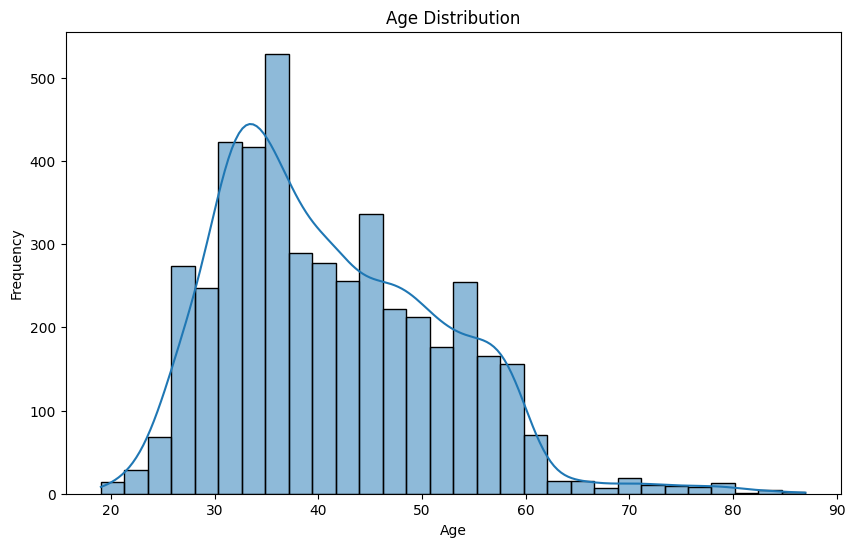

In [20]:
# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-df69ed7791a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=bank_data['job'], order=bank_data['job'].value_counts().index, palette='viridis')


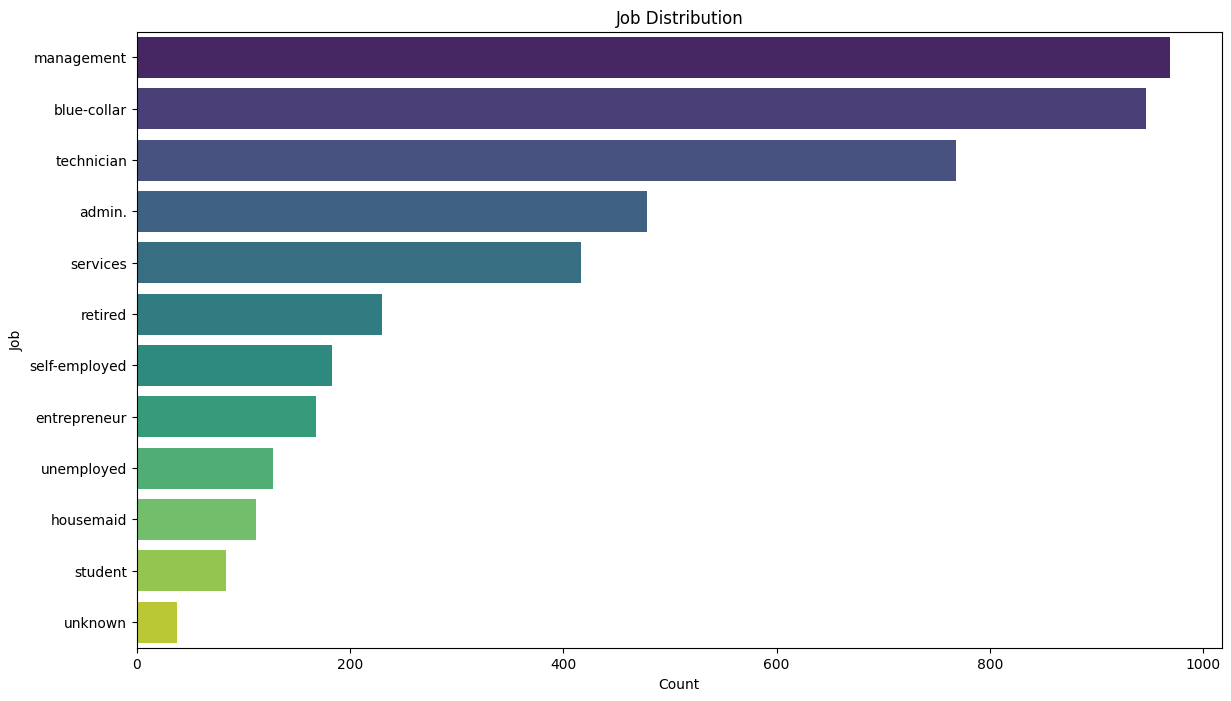

In [21]:
# 2. Job Distribution
plt.figure(figsize=(14, 8))
sns.countplot(y=bank_data['job'], order=bank_data['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

<ipython-input-22-6afda1b58797>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='balance', y='job', data=bank_data, palette='viridis')


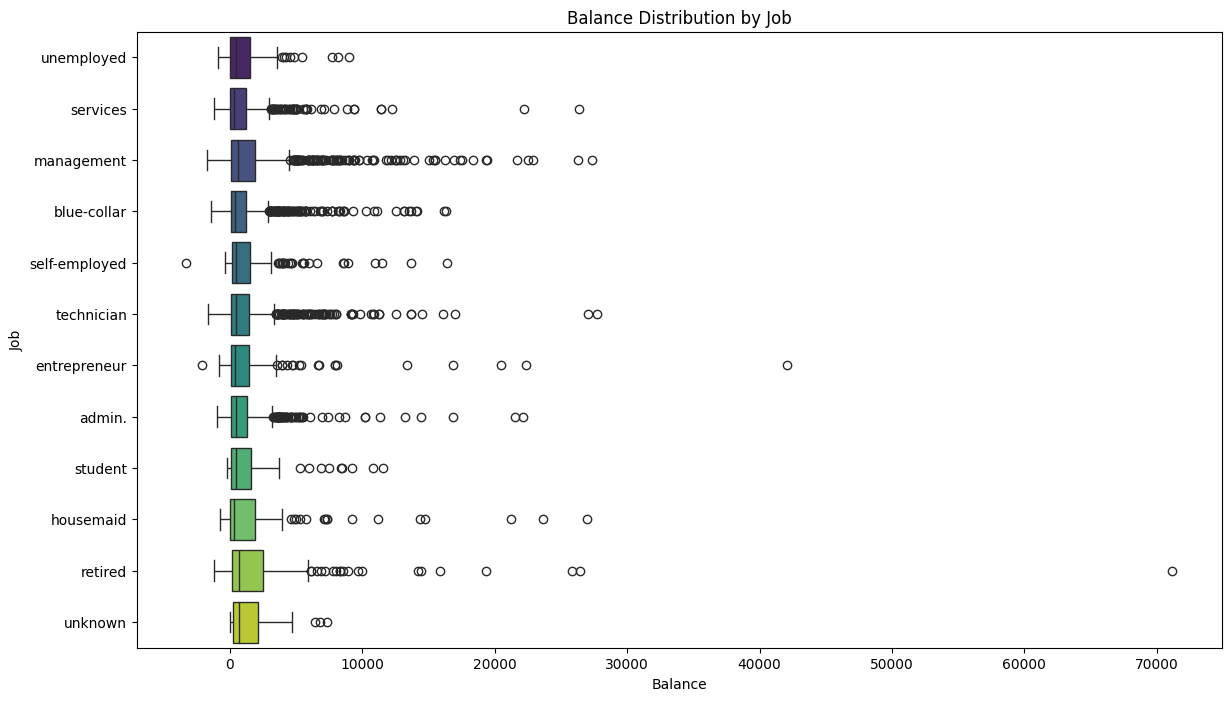

In [22]:
# 3. Balance Distribution by Job
plt.figure(figsize=(14, 8))
sns.boxplot(x='balance', y='job', data=bank_data, palette='viridis')
plt.title('Balance Distribution by Job')
plt.xlabel('Balance')
plt.ylabel('Job')
plt.show()

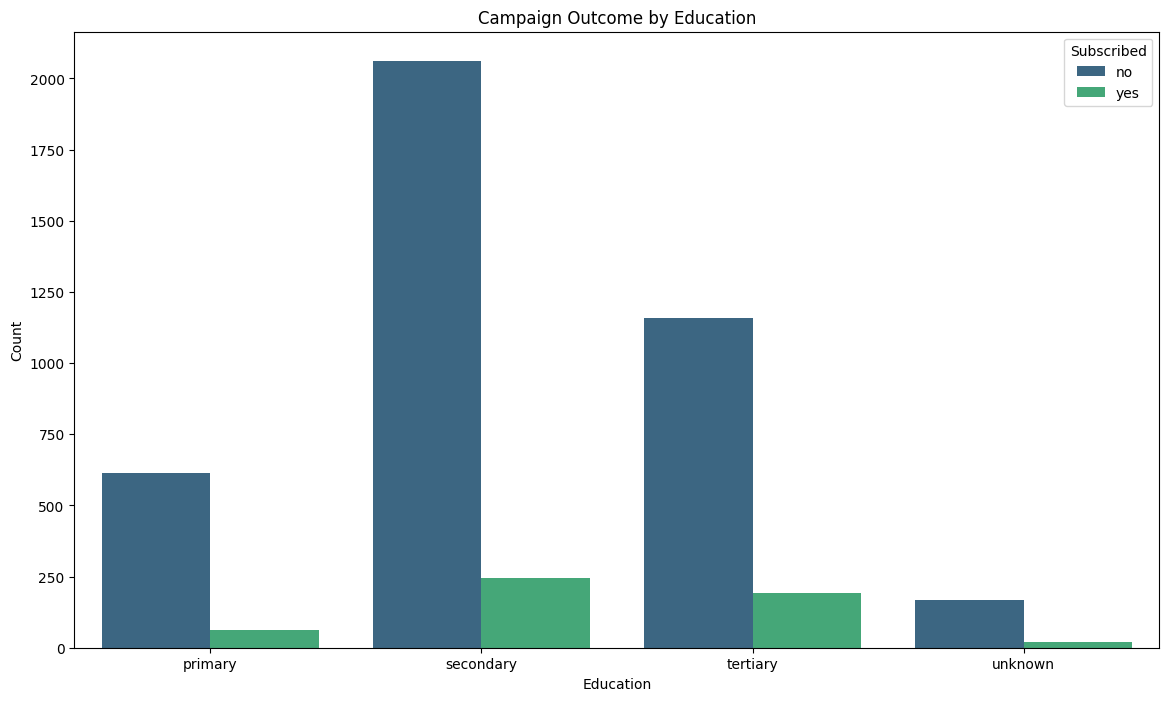

In [23]:
# 4. Campaign Outcome by Education
plt.figure(figsize=(14, 8))
sns.countplot(x='education', hue='y', data=bank_data, palette='viridis')
plt.title('Campaign Outcome by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

Step 2: Data Preprocessing

In [6]:
# Check for missing values
print(bank_data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
# Encode categorical variables
bank_data_encoded = pd.get_dummies(bank_data, drop_first=True)

In [8]:
# Encode categorical variables
bank_data_encoded = pd.get_dummies(bank_data, drop_first=True)

In [9]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank_data_encoded[numerical_features] = scaler.fit_transform(bank_data_encoded[numerical_features])

In [10]:
# Display the processed data
print(bank_data_encoded.head())

        age   balance       day  duration  campaign     pdays  previous  \
0 -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413   
1 -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734   
2 -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124   
3 -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413   
4  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False             False          False  ...      False   
3            False             False          False  ...       True   
4             True             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False      False      False       True 

Step 3: Customer Segmentation using Clustering

In [11]:
# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bank_data_encoded)
    score = silhouette_score(bank_data_encoded, kmeans.labels_)
    silhouette_scores.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

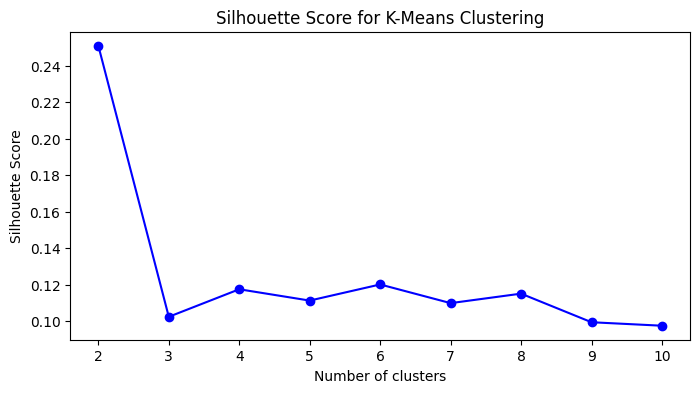

In [12]:
# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-Means Clustering')
plt.show()

In [13]:
# Apply K-Means with the optimal number of clusters
optimal_k = K[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
bank_data_encoded['Cluster'] = kmeans.fit_predict(bank_data_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
# Display the clustered data
print(bank_data_encoded['Cluster'].value_counts())

Cluster
0    3771
1     750
Name: count, dtype: int64


Step 4: Developing a Recommendation System

In [15]:
# Select a sample customer
sample_customer = bank_data_encoded.iloc[0].drop('Cluster')

In [16]:
# Find the nearest neighbors for the sample customer
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
neighbors.fit(bank_data_encoded.drop(columns=['Cluster']))
distances, indices = neighbors.kneighbors([sample_customer])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [17]:
# Display the recommendations
print("Recommendations for the sample customer:")
print(bank_data_encoded.iloc[indices[0]])

Recommendations for the sample customer:
           age   balance       day  duration  campaign     pdays  previous  \
0    -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413   
2340 -1.339956 -0.428889 -0.353507 -0.542518 -0.255231 -0.407218 -0.320413   
2119 -0.961707 -0.276362  0.616572 -0.396267 -0.255231 -0.407218 -0.320413   
4315 -0.394334 -0.223858  0.616572 -0.173043 -0.576829 -0.407218 -0.320413   
733  -0.772583 -0.087946  0.495312 -0.919691 -0.255231 -0.407218 -0.320413   

      job_blue-collar  job_entrepreneur  job_housemaid  ...  month_mar  \
0               False             False          False  ...      False   
2340            False             False          False  ...      False   
2119            False             False          False  ...      False   
4315            False             False          False  ...      False   
733             False             False          False  ...      False   

      month_may  month_nov  month_oct  month_

Step 5: Evaluation and Results

In [18]:
# Evaluate the clustering using the silhouette score
final_score = silhouette_score(bank_data_encoded.drop(columns=['Cluster']), kmeans.labels_)
print(f'Silhouette Score for the final clustering: {final_score}')

Silhouette Score for the final clustering: 0.2509122798689347


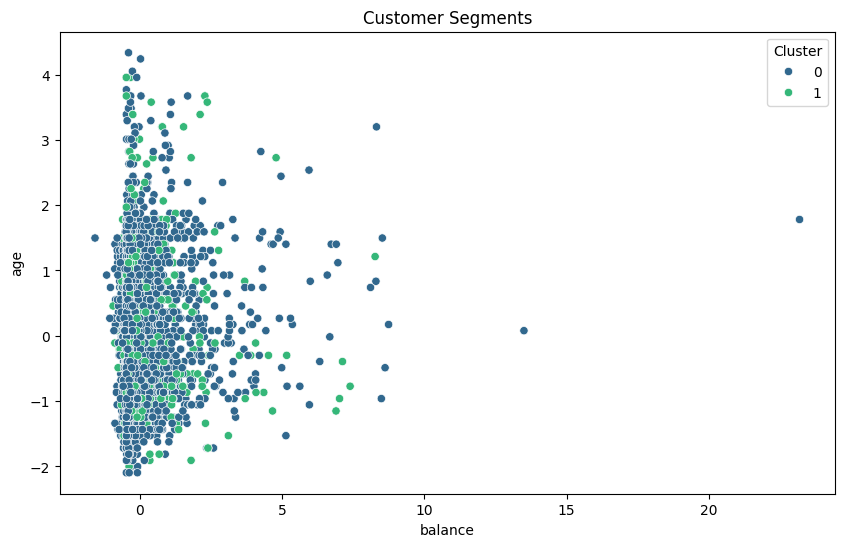

In [19]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bank_data_encoded, x='balance', y='age', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()